**Upload files on google colab to start code**


In [0]:
#from google.colab import files
#uploaded = files.upload()

#Preprocessing
Import all necassary library

In [0]:
import numpy as np
import tensorflow as tf
import sklearn
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import RidgeClassifier as Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score as cvs
from sklearn.preprocessing import MinMaxScaler


*Read files*

In [0]:
train = pd.read_csv("train_HR.csv")
test = pd.read_csv("test_HR.csv")

Check the data in train

In [22]:
train.head(15)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


*Convert all string formats to usable numerical format*



In [23]:
#gender of female as 2 and male as 1
train.loc[train["gender"] == "f", "gender"] = 2
train.loc[train["gender"] == "m", "gender"] = 1
test.loc[test["gender"] == "f", "gender"] = 2
test.loc[test["gender"] == "m", "gender"] = 1
#Think of age as retarding factor due to weak brain
tr_max= np.max(train["age"])
train["age"]=train["age"].apply(lambda x:(tr_max-x)/tr_max*2)
ts_max= np.max(test["age"])
test["age"]=test["age"].apply(lambda x:(ts_max-x)/ts_max*2)

#Split region numbers
train["region"]=train["region"].apply(lambda x:x.split("_")[1]).astype(int)
test["region"]=test["region"].apply(lambda x:x.split("_")[1]).astype(int)

#create education classes
train.loc[train["education"] == "Master's & above", "education"] = 3
train.loc[train["education"] == "Bachelor's", "education"] = 2
train.loc[train["education"] == "Below Secondary", "education"] = 1
#train[train.isna()] = 0
test.loc[test["education"] == "Master's & above", "education"] = 3
test.loc[test["education"] == "Bachelor's", "education"] = 2
test.loc[test["education"] == "Below Secondary", "education"] = 1
#test[test.isna()] = 0

#Similarly do the same for recruitment channel
train.loc[train["recruitment_channel"] == "referred", "recruitment_channel"] = 3
train.loc[train["recruitment_channel"] == "sourcing", "recruitment_channel"] = 2
train.loc[train["recruitment_channel"] == "other", "recruitment_channel"] = 1
test.loc[test["recruitment_channel"] == "referred", "recruitment_channel"] = 3
test.loc[test["recruitment_channel"] == "sourcing", "recruitment_channel"] = 2
test.loc[test["recruitment_channel"] == "other", "recruitment_channel"] = 1

#Seperate yTrain and emp_id for test data and remove unnecassary ones
out = train.pop("is_promoted")
train=train.drop(["employee_id", "department"], axis=1)
emp_id = test.pop("employee_id")
test=test.drop(["department"],axis=1)

#Names of columns for future use
tr_cols= train.columns
ts_cols= test.columns
out.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [24]:
train.iloc[54775:].head(10)

,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
54775,22,2,1,1,1,1.000000,1.0,4,0,0,60
54776,2,1,2,2,1,1.266667,5.0,2,0,0,47
54777,13,2,1,1,1,0.266667,2.0,3,0,0,77
54778,2,2,2,2,1,1.000000,3.0,3,0,0,70
54779,30,2,2,2,1,0.866667,3.0,3,0,0,86
54780,19,2,2,2,1,0.700000,5.0,7,0,0,60
54781,27,2,2,2,1,0.733333,5.0,3,1,0,50
54782,2,1,1,2,2,1.133333,3.0,2,0,0,60
54783,2,1,1,1,3,1.233333,3.0,2,0,0,71
54784,30,2,1,1,1,0.700000,5.0,9,0,0,48


#Now checking the Quality of data
Checking correlation matrix between matrices

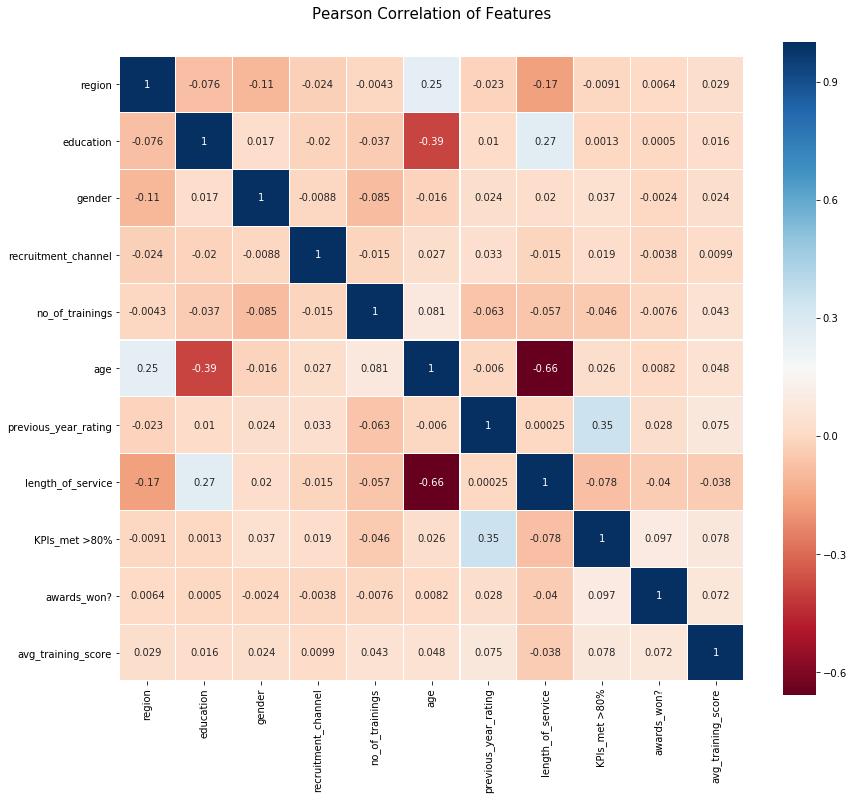

In [25]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

*Normalizing the data*

In [26]:
scalar = MinMaxScaler(feature_range=(0, 1))
sc = scalar.fit(train)
train = scalar.transform(train)
sc = scalar.fit(test)
test = scalar.transform(test)
#print(train.data_range_)
train = pd.DataFrame(data=train,columns=tr_cols)
test = pd.DataFrame(data=test,columns=ts_cols)
train.head(15)

,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.181818,1.0,1.0,0.5,0.000000,0.625,1.00,0.194444,1.0,0.0,0.166667
1,0.636364,0.5,0.0,0.0,0.000000,0.750,1.00,0.083333,0.0,0.0,0.350000
2,0.545455,0.5,0.0,0.5,0.000000,0.650,0.50,0.166667,0.0,0.0,0.183333
3,0.666667,0.5,0.0,0.0,0.111111,0.525,0.00,0.250000,0.0,0.0,0.183333
4,0.757576,0.5,0.0,0.0,0.000000,0.375,0.50,0.027778,0.0,0.0,0.566667
5,0.030303,0.5,0.0,0.5,0.111111,0.725,0.50,0.166667,0.0,0.0,0.766667
6,0.575758,0.5,1.0,0.0,0.000000,0.725,0.50,0.111111,0.0,0.0,0.333333
7,1.000000,1.0,0.0,0.5,0.000000,0.675,0.50,0.138889,0.0,0.0,0.400000
8,0.575758,0.5,0.0,0.0,0.000000,0.800,0.75,0.111111,0.0,0.0,0.733333
9,0.000000,1.0,0.0,0.5,0.000000,0.700,1.00,0.111111,1.0,0.0,0.250000


*Removing all invalid values in data*

In [0]:
train[train.isna()] = 0
test[test.isna()] = 0

#Training the model on data


In [28]:
#Using Support Vector Machines
model1= svm.SVC()
model1.fit(train, out)
train['M1'] = model1.predict(train)
test['M1'] = model1.predict(test)
model2 = Ridge(alpha = 0.5)
model2.fit(train, out)
train['M2'] = model2.predict(train)
test['M2'] = model2.predict(test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


*Checking for overfitting*

In [0]:
lr = GridSearchCV(
      estimator=RandomForestClassifier(),
      param_grid={
       'max_depth': range(3,6),
       'n_estimators': (10, 50, 100, 500),
      },
      cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)

bst_para = lr.fit(train, out)

best_params = bst_para.best_params_
model = RandomForestClassifier(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)
model.fit(train,out)
#Check the cross validation result
scores=cvs(model, train, out, cv=5)

In [30]:
print(scores)

[0.92601715 0.92382777 0.92410144 0.92610163 0.92546301]


**Predict the result**

In [34]:
result = model.predict(test)
results = pd.DataFrame({'employee_id': emp_id,'is_promoted': result})
results.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [0]:
results.to_csv('predict.csv', index=False)
#Save result for google colab
from google.colab import files
files.download('predict.csv')